In [1]:
def load_model_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_sum.pt"))

def load_R2SP_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "R2SP_client_sum.pt"))

def load_server_to_client_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "sever_to_client_sum.pt"))

def load_client_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_loss.pt"))

def load_client_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_acc.pt"))

def load_client_size(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_size.pt"))

def load_client_time(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_client_time.pt"))


def load_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_acc.pt"))

def load_time(exp, cs=False):

    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.time"))


def load_ms(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_size.pt"))

def load_fed_avg_acc(exp, cs=False):
#     print(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_acc.pt"))
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_acc.pt"))

def load_fed_avg_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_loss.pt"))

def load_model_G(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_G.pt"))



%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# Create data
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
from itertools import product
from utils.save_load import load



if os.getcwd().startswith('/mnt/sda1/mcj/PruneFL-master/PruneFL-master'):
    os.chdir('/mnt/sda1/mcj/PruneFL-master/PruneFL-master')

if os.getcwd().startswith("/data/mcj/Prune_fl"):
    os.chdir("/data/mcj/Prune_fl")

dataset_name = "CIFAR10"
import configs.cifar10 as config
client_sel = False
time_lim = (-1000, 60000)
acc_lim = (0.0, 0.9)
lottery_ticket_acc_lim = (0.7, 0.9)
n = 10

result_path = join("results", config.EXP_NAME)
if not os.path.isdir(f"results/{config.EXP_NAME}/figs"):
    os.makedirs(f"results/{config.EXP_NAME}/figs")
fig_path = join(result_path, "figs")

In [2]:
import os
os.listdir(result_path)

['PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedasyn_niid__n__50_____esc',
 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polyfed_avg_Resdiual_niid__n__50_____esc',
 'snip',
 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__polyheterofl_niid__n__50_____esc',
 '.ipynb_checkpoints',
 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__recover_polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.05__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polymask_fed_avg_Resdiual_niid__n__50_____esc',
 'Prune_increase_FL_CIFAR10_[1, 0.5, 0.1]un_fair_0.0_100_0.2_-1.0_sub_fed_avg_g_0.0_0_n_False',
 'Prune_increase_FL_CIFAR10_[1, 0.5, 0.1]n_-1.0_100_0.2_-1.0_sub_fed_avg_g_0.0_0_n_False',
 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
 'PIF_CIFAR10_

In [7]:
exp = [
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]1.0__recover_polyfed_avg_niid__n__50_____esc',
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedasyn_niid__n__50_____esc',
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]1.0__asyn__recover_polyfedfix_niid__n__50_____esc',
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__polyheterofl_niid__n__50_____esc',

'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.05__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',

# 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__recover_polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
# 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polymask_fed_avg_Resdiual_niid__n__50_____esc',
# 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polybuff_mask_fed_avg_niid__n__50_____esc',
# 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
# 'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polyfed_avg_Resdiual_niid__n__50_____esc',
]


exp_legend = [    

    'FedAvg',
     'FedAsyn',
    'FedFIX',    
    'Hetero-fl',
    'PR-FL',
#     'syn-PR-FL',
#     'nobuff-PR-FL',
#     'noRes-PR-FL',
#     'noRecovr-PR-FL',
#     'fedavg-PR-FL',
    
]

<IPython.core.display.Javascript object>


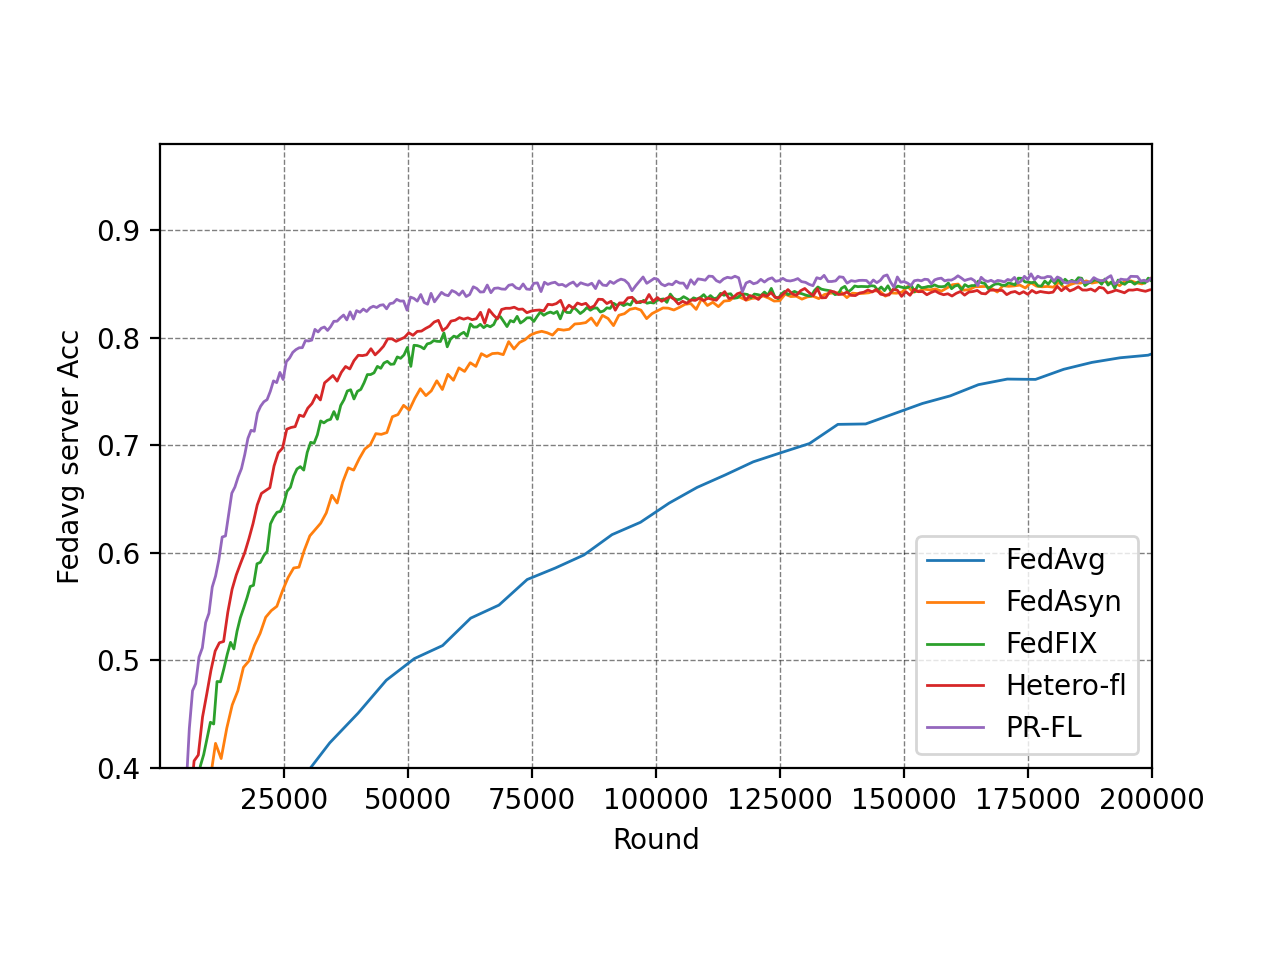

352 352
332 332
584 584
456 456
434 434


In [10]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:

        avg_acc = load_acc(exp_name)
        fed_avg_acc = load_fed_avg_acc(exp_name)
    
#         avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        
        
            
        time = load_time(exp_name)
#         time = range(0,len(time)*50,50)


        print(len(time),len(avg_acc))
#         plt.plot(time, acc, linewidth=1, label=exp_legend[i])
#         plt.plot(avg_acc, linewidth=1, label=exp_legend[i])
        if len(fed_avg_acc) != 0:
            plt.plot(time,fed_avg_acc, linewidth=1, label=exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,200000])
plt.ylim([0.40,0.98])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


In [ ]:
data1 = [[
    "PIF_CelebA_[1, 0.5, 0.1]n_-1.0_30_0.2_1e-05_sub_fed_avg_g_0.0_3_n_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_-0.5_30_0.2_1e-05_sub_fed_avg_g_0.0_3_n_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_-1.5_30_0.2_1e-05_sub_fed_avg_g_0.0_3_n_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_-1.0_30_0.2_1e-05_sub_fed_avg_g_0.0_3_c_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_0.0_30_0.2_1e-05_sub_fed_avg_g_0.0_10_n_False_False",
    "PIF_CelebA_[1, 0.5, 0.1]n_0.0_30_0.2_1e-05_sub_fed_avg_g_0.0_3_n_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_1.0_30_0.2_1e-05_sub_fed_avg_g_0.0_10_n_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_-1.0_30_0.2_1e-05_sub_fed_avg_g_0.0_10_n_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_0.0_30_0.2_1e-05_sub_fed_avg_g_0.0_10_n_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_0.0_30_0.2_1e-05_sub_fed_avg_g_0.0_10_c_False_True",
    "PIF_CelebA_[1, 0.5, 0.1]n_0.0_30_0.2_0.0_sub_fed_avg_g_0.0_10_n_False_True",
    "CelebA_1",
    "CelebA_1wd"
]]
config = None
len_round ={}
min_modelsize = {}
density_round = {}
end_best_acc={}
end_best_NPMI={}
end_best_td={}
acc_time = {}
npmi_time = {}
td_time = {}
train_time = {}
all_time = {}
best_acc={}
td_max_acc = {}
n = 10
import pandas as pd
experiment_data = {
    'exp_name': [],
    'best_acc_index': [],
    'best_acc_value': [],
    'td_max_acc_1': [],
    'td_max_acc_2': [],
    'td_max_acc_3': [],
    'td_max_acc_4': [],
    'len_round': [],
    'density_round': [],
    'end_best_acc': [],

}
for data in exp:
    if 'CelebA' in data[0]:
        import configs.celeba as config
        td = [500,1000,1500,1800]
    if 'CIFAR10' in data[0]:
        import configs.cifar10 as config

    if 'TINYIMAGENET' in data[0]:
        import configs.imagenet100 as config

    if 'femnist' in data[0]:
        import configs.femnist as config

    result_path = join("results", config.EXP_NAME)
    for exp_name in data:
        experiment_data['exp_name'].append(exp_name)
        acc = np.array(load_fed_avg_acc(exp_name))
        max_acc = np.max(acc)
        best_acc[exp_name] = [(np.argmax(acc)-1)*config.EVAL_DISP_INTERVAL,np.max(acc)]
        experiment_data['best_acc_index'].append(best_acc[exp_name][0])
        experiment_data['best_acc_value'].append(best_acc[exp_name][1])
        tdmax_acc = []
        for d in td:
            n = d//config.EVAL_DISP_INTERVAL+1
            if (n+5) > len(acc)-1:
                c = len(acc-1)
            else:
                c = n+5
            if n-5 >= c:
                m = c-1
            else:
                m = n-5
            tdmax_acc.append([d,np.max(acc[m:c])])
        td_max_acc[exp_name] = copy.deepcopy(tdmax_acc)
        experiment_data['td_max_acc_1'].append(td_max_acc[exp_name][0][1])
        experiment_data['td_max_acc_2'].append(td_max_acc[exp_name][1][1])
        experiment_data['td_max_acc_3'].append(td_max_acc[exp_name][2][1])
        experiment_data['td_max_acc_4'].append(td_max_acc[exp_name][3][1])
        len_round[exp_name] = (len(acc)-1)*config.EVAL_DISP_INTERVAL+1
        experiment_data['len_round'].append(len_round[exp_name])


        try:
            client_density = np.array(load_client_density(exp_name))[:, -1]
            client_density = client_density[::config.EVAL_DISP_INTERVAL]
            assert len(client_density) == len(acc)
            end_best_acc[exp_name] = np.max(acc[client_density==1])
            dr = []
            for index in range(1, len(client_density)):
                if client_density[index] != client_density[index - 1]:
                    dr.append([round(client_density[index],1),(index-1)*config.EVAL_DISP_INTERVAL])
            density_round[exp_name] = copy.deepcopy(dr)



        except FileNotFoundError:
            print(f"do not have client_density, {exp_name}")
        experiment_data['density_round'].append(density_round.get(exp_name, []))
        experiment_data['end_best_acc'].append(end_best_acc.get(exp_name,[]))

In [35]:
exp = [

'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',

'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__recover_polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polymask_fed_avg_Resdiual_niid__n__50_____esc',
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polybuff_mask_fed_avg_niid__n__50_____esc',
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc',
'PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polyfed_avg_Resdiual_niid__n__50_____esc',
]


exp_legend = [    

    'PR-FL',
    'syn-PR-FL',
    'nobuff-PR-FL',
    'noRes-PR-FL',
    'noRecovr-PR-FL',
    'fedavg-PR-FL',
    
]

<IPython.core.display.Javascript object>


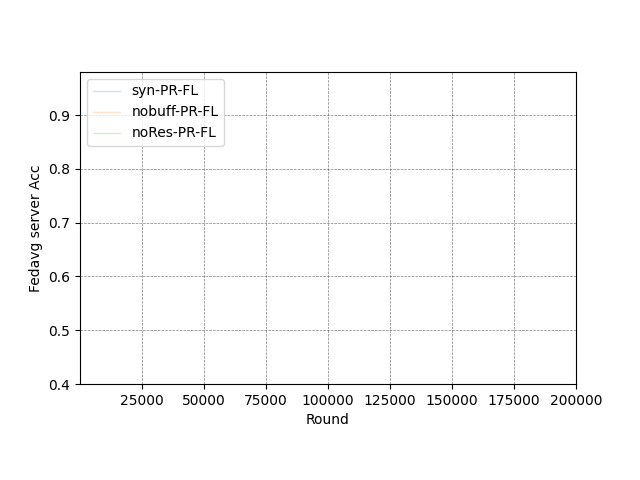

Skipping training results for CIFAR10, PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc. Client selection = False.
397 397
340 340
510 510
Skipping training results for CIFAR10, PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__polybuff_mask_fed_avg_Resdiual_niid__n__50_____esc. Client selection = False.
Skipping training results for CIFAR10, PIF_CIFAR10_[1.0, 0.6, 0.3, 0.1]0.08__asyn__recover_polyfed_avg_Resdiual_niid__n__50_____esc. Client selection = False.


In [36]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:

        avg_acc = load_acc(exp_name)
        fed_avg_acc = load_fed_avg_acc(exp_name)
    
#         avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        
        
            
        time = load_time(exp_name)
#         time = range(0,len(time)*50,50)


        print(len(time),len(avg_acc))
#         plt.plot(time, acc, linewidth=1, label=exp_legend[i])
#         plt.plot(avg_acc, linewidth=1, label=exp_legend[i])
        if len(fed_avg_acc) != 0:
            plt.plot(time,fed_avg_acc, linewidth=1, label=exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round")
plt.ylabel("Fedavg server Acc")
plt.xlim([1,200000])
plt.ylim([0.40,0.98])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()
